,Country,Year,Drivers/passengers of 4-wheeled vehicles,Drivers/passengers of motorized 2- or 3-wheelers,Cyclists,Pedestrians,Other/unspecified road users
0,Australia,2016,60.9,19.3,2.2,14.0,3.5
1,USA,2016,30.7,14.2,2.3,15.3,4.2
2,UK,2016,38.5,20.5,5.5,23.7,4.1
3,Spain,2016,6.2,21.9,3.7,29.2,6.4
4,Sweden,2016,34.7,16.3,8.1,0.0,6.3
5,Germany,2016,47.8,18.8,12.3,15.3,5.9
6,Israel,2016,46.3,12.2,2.7,28.7,10.1
7,Canada,2016,64.3,10.8,2.5,15.2,7.2
8,Argentina,2016,47.2,22.2,2.4,8.2,20.0
9,Belgium,2016,57.1,14.4,11.1,12.2,5.0


,Country,Year,Law requires helmet to be fastened
0,Australia,2017,Yes
1,USA,2017,No
2,UK,2017,Yes
3,Spain,2017,No
4,Sweden,2017,Yes
5,Germany,2017,No
6,Israel,2017,Yes
7,Canada,2017,Yes
8,Argentina,2017,Yes
9,Belgium,2017,No


,Country,Year,Drivers,Adult passengers,Child passengers
0,Australia,2017,Yes,Yes,Prohibited under 8 yrs
1,USA,2017,No,No,Not restricted
2,UK,2017,Yes,Yes,Not restricted
3,Spain,2017,Yes,Yes,Prohibited under 7 / 12 yrs
4,Sweden,2017,Yes,Yes,Not restricted
5,Germany,2017,Yes,Yes,Not restricted
6,Israel,2017,Yes,Yes,Not restricted
7,Canada,2017,Yes,Yes,Not restricted
8,Argentina,2017,Yes,Yes,Not restricted
9,Belgium,2017,Yes,Yes,Prohibited under 3 /8 yrs


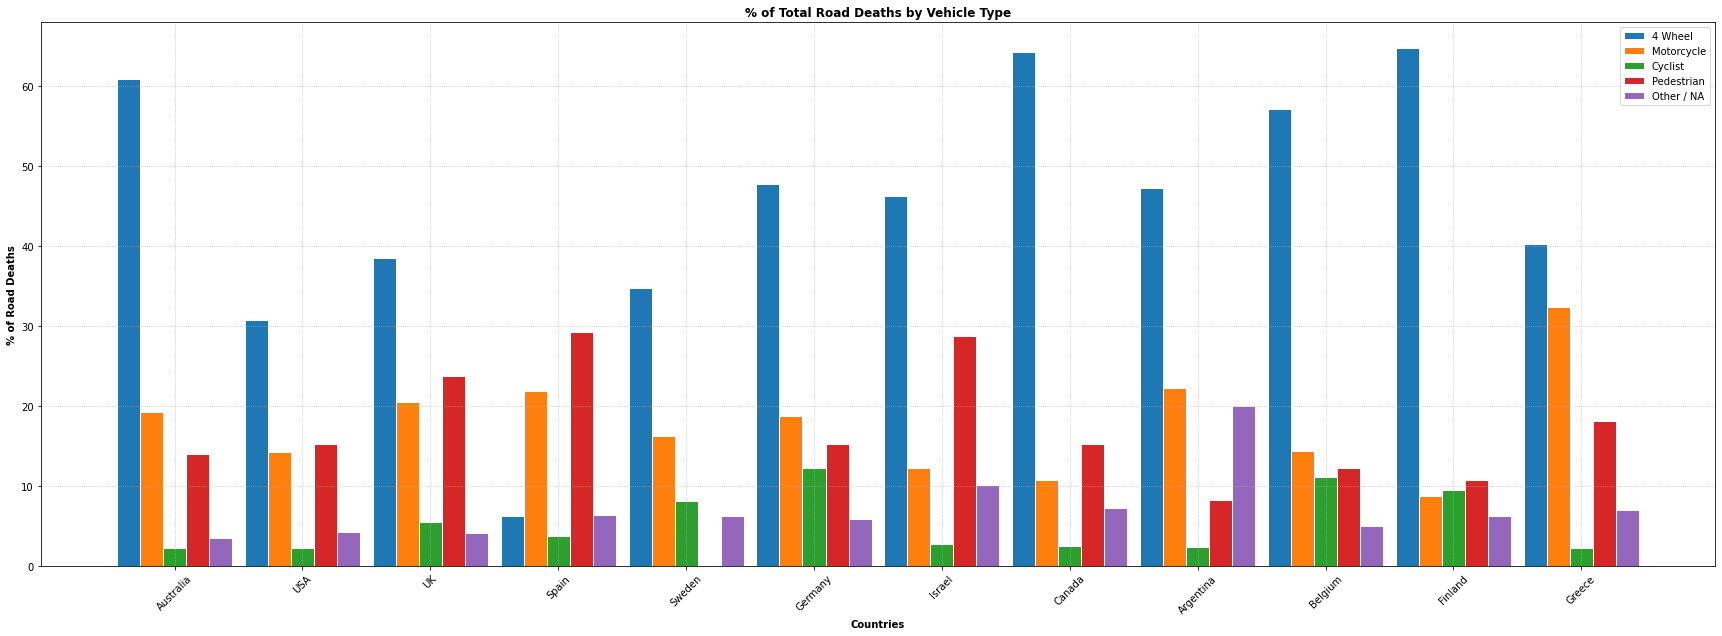

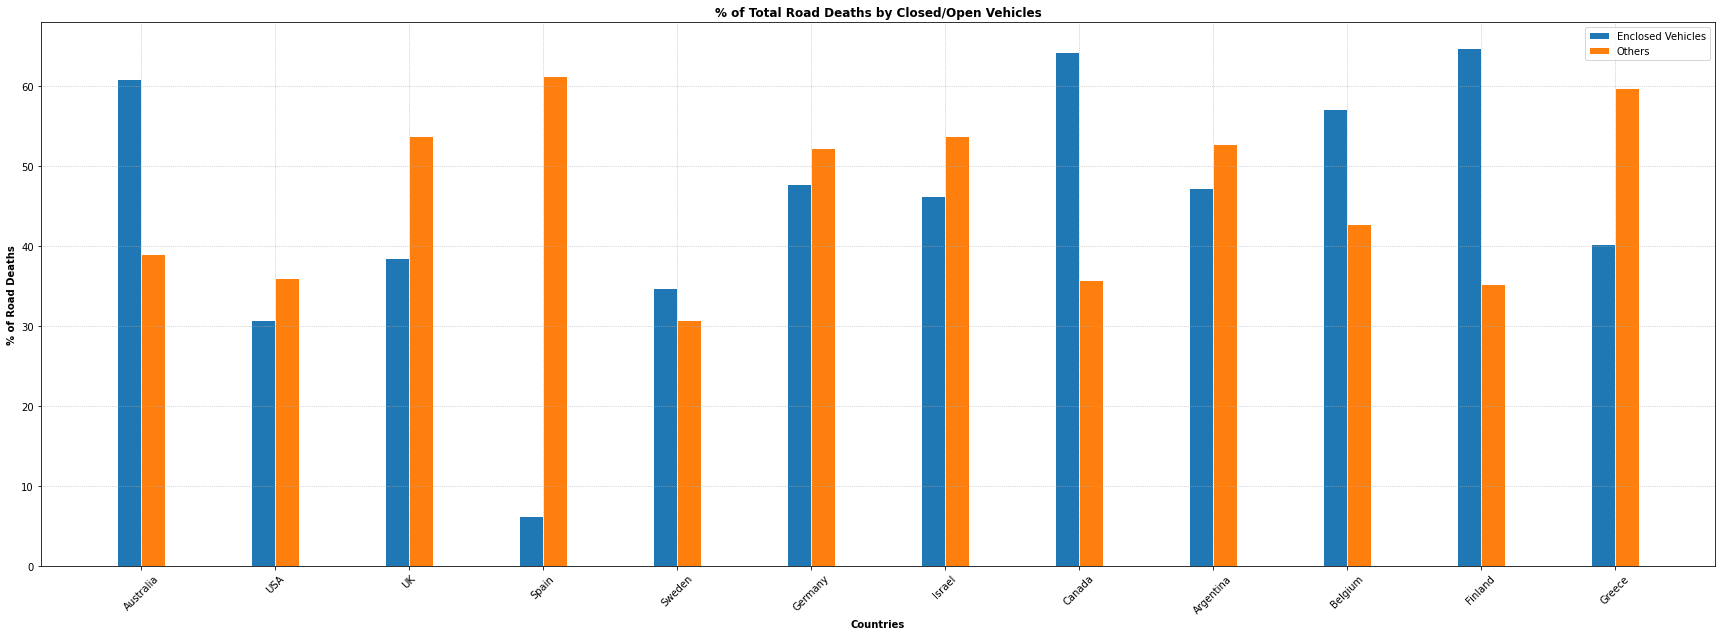

In [6]:
#####
###
##
#    SYNOPSIS
#
#    This project aims to uncover patterns in global driving/traffic incidents. It will be examining relationships between types of travel, basic metrics of travel,
#    population, country economic & political status, mortality & injury rates; and others as the data allows.
#
#    Source and output can be found (with access) on https://github.com/cyrusauyeungc/Project_01
#
#    https://www.who.int/data/gho
#    https://apps.who.int/gho/data/node.main.A989?lang=en
#    WHO global road safety datasets
#    https://stats.oecd.org/
#    Road injury accidents : Road casualties (under Transport > Transport Safety > Road Injury Accidents
#    Road injury accidents : Passenger Transport Showing the Passenger KM, millions (under Transport > Transport Measurement > Passenger Tranpsort > Overview> Select "Road Passenger Transport" on the header "Variable"
#
#     CONTRIBUTORS
#    
#     Cyrus Au Yeing @github/cyrusauyeungc
#     John Bingley @github/JB-DA
#     Seranica Williamson @github/seranica
#     Parastoo Razavi @github/parastoorazavi
##
###
#####


### SETTINGS
##
# Dependencies
import pandas as pd
from os import listdir
import numpy as np
import matplotlib.pyplot as plt


# Set some empty dataframes to append to later
df_child_restraints =\
df_deaths_vehicle_type =\
df_drink_driving_data =\
df_drink_driving_limit =\
df_helmet_fastening =\
df_helmet_laws =\
df_helmet_law_applicability  =\
df_max_speed_limits  =\
df_number_registered_vehicles  =\
df_seat_belt_laws  =\
df_seat_belt_rates  =\
df_speed_data_by_country  =\
df_total_deaths  =\
df_vehicle_standards  =\
df_world_bank_GNI =\
df_helmlaw =\
pd.DataFrame()


# List of countries to analyse, using CSV format for simplicity
countries = [ "Australia",
             "United States of America",
             "United Kingdom of Great Britain and Northern Ireland",
             "Spain",
             "Sweden",
             "Germany",
             "Israel",
             "Canada",
             "Argentina",
             "Belgium",
             "Finland",
             "Greece",
            ]


### LOAD DATA
##
# Read CSVs into variables
raw_child_restraints = pd.read_csv( '../data_raw/child_restraints_by_country.csv' ) #Parastoo
raw_deaths_vehicle_type = pd.read_csv( '../data_raw/deaths_by_vehicle_type.csv', skiprows = 1 ) #John
raw_drink_driving_data = pd.read_csv( '../data_raw/drink_driving_data.csv' ) #Seranica
raw_drink_driving_limit = pd.read_csv( '../data_raw/drink_driving_limit.csv', skiprows = 1 ) #Seranica
raw_helmet_fastening = pd.read_csv( '../data_raw/helmet_fastening.csv' ) #John
raw_helmet_laws = pd.read_csv( '../data_raw/helmet_laws_by_country.csv' ) #John
raw_helmet_law_applicability = pd.read_csv( '../data_raw/helmet_law_applicability.csv', skiprows = 1 ) #John
raw_max_speed_limits = pd.read_csv( '../data_raw/max_speed_limits_by_country.csv', skiprows = 1 )
raw_number_registered_vehicles = pd.read_csv( '../data_raw/number_registered_vehicles.csv' ) #John
raw_seat_belt_laws = pd.read_csv( '../data_raw/seat_belt_laws.csv' ) #Parastoo
raw_seat_belt_rates = pd.read_csv( '../data_raw/seat_belt_rates.csv', skiprows = 1 ) #Parastoo
raw_speed_data_by_country = pd.read_csv( '../data_raw/speed_data_by_country.csv' ) #Cyrus
raw_total_deaths = pd.read_csv( '../data_raw/total_deaths_by_country.csv', skiprows = 1 )
raw_vehicle_standards = pd.read_csv( '../data_raw/vehicle_standards_by_country.csv', skiprows = 1 )
raw_world_bank_GNI = pd.read_csv( '../data_raw/world_bank_GNI_per_capita_years_2017_dollars.csv', skiprows = 4 ) #Parastoo


# Pull out data from CSVs using only the countries to analyse, we use append here even though it is non-performant; analysis performed on dataframes multiple times, pulling from CSV is one time
for i in countries: 
    df_child_restraints = df_child_restraints.append( raw_child_restraints [ raw_child_restraints ['Country/Area'] .str.contains(i) ], ignore_index = True)    
    df_deaths_vehicle_type = df_deaths_vehicle_type.append( raw_deaths_vehicle_type [ raw_deaths_vehicle_type ['Country'] .str.contains(i) ], ignore_index = True )    
    df_drink_driving_data = df_drink_driving_data.append( raw_drink_driving_data [ raw_drink_driving_data ['Country'] .str.contains(i) ], ignore_index = True )    
    df_drink_driving_limit = df_drink_driving_limit.append( raw_drink_driving_limit [ raw_drink_driving_limit ['Country'] .str.contains(i) ], ignore_index = True )    
    df_helmet_fastening = df_helmet_fastening.append( raw_helmet_fastening [ raw_helmet_fastening ['Country'] .str.contains(i) ], ignore_index = True )    
    df_helmet_laws = df_helmet_laws.append( raw_helmet_laws [ raw_helmet_laws ['Country'] .str.contains(i) ], ignore_index = True )    
    df_helmet_law_applicability = df_helmet_law_applicability.append( raw_helmet_law_applicability [ raw_helmet_law_applicability ['Country'] .str.contains(i) ], ignore_index = True )    
    df_max_speed_limits = df_max_speed_limits.append( raw_max_speed_limits [ raw_max_speed_limits ['Country'] .str.contains(i) ], ignore_index = True )    
    df_number_registered_vehicles = df_number_registered_vehicles.append( raw_number_registered_vehicles [ raw_number_registered_vehicles ['Country'] .str.contains(i) ], ignore_index = True )    
    df_seat_belt_laws = df_seat_belt_laws.append( raw_seat_belt_laws [ raw_seat_belt_laws ['Country/Area'] .str.contains(i) ], ignore_index = True )    
    df_seat_belt_rates = df_seat_belt_rates.append( raw_seat_belt_rates [ raw_seat_belt_rates ['Country'] .str.contains(i) ], ignore_index = True )    
    df_speed_data_by_country = df_speed_data_by_country.append( raw_speed_data_by_country [ raw_speed_data_by_country ['Country'] .str.contains(i) ], ignore_index = True )    
    df_total_deaths = df_total_deaths.append( raw_total_deaths [ raw_total_deaths ['Country'] .str.contains(i) ], ignore_index = True )    
    df_vehicle_standards = df_vehicle_standards.append( raw_vehicle_standards [ raw_vehicle_standards ['Country'] .str.contains(i) ], ignore_index = True )    
    df_world_bank_GNI = df_world_bank_GNI.append( raw_world_bank_GNI [ raw_world_bank_GNI ['Country Name'] .str.contains(i) ] )


### TIDY SOME THINGS
##
# Replace long country names to something easier to display
df_child_restraints ['Country/Area'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_deaths_vehicle_type ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_drink_driving_data ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_drink_driving_limit ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_helmet_fastening ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_helmet_laws ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_helmet_law_applicability ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_max_speed_limits ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_number_registered_vehicles ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_seat_belt_laws ['Country/Area'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_seat_belt_rates ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_speed_data_by_country ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_total_deaths ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_vehicle_standards ['Country'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
df_world_bank_GNI ['Country Name'] .replace( { 'United States of America' : 'USA', 'United Kingdom of Great Britain and Northern Ireland' : 'UK' }, inplace = True )
countries[ countries.index ( "United States of America" ) ] = "USA" ; countries[ countries.index( "United Kingdom of Great Britain and Northern Ireland" ) ] = "UK"


# Replace missing values with 0
df_deaths_vehicle_type [' Pedestrians' ] .fillna(0, inplace=True)


### DISPLAY CHECK FOR DATAFRAMES
##
# Only for error checking and to see what data needs further cleaning, comment out before running final

# display( df_child_restraints )
display( df_deaths_vehicle_type )
# display( df_drink_driving_data )
# display( df_drink_driving_limit )
# display( df_helmet_fastening )
display( df_helmet_laws )
display( df_helmet_law_applicability )
# display( df_max_speed_limits )
# display( df_number_registered_vehicles )
# display( df_seat_belt_laws )
# display( df_seat_belt_rates )
# display( df_speed_data_by_country )
# display( df_total_deaths )
# display( df_vehicle_standards )
# display ( df_world_bank_GNI )


### GRAPHS
##
# Bar chart to show relationship of mortality rates between vehicle types as % of total mortality
# Bar chart chosen as only 60% countries had data that was reliable
plt.figure(figsize = (30,10))
barWidth = 0.18

bar1 = pd.to_numeric( df_deaths_vehicle_type[' Drivers/passengers of 4-wheeled vehicles'] )
bar2 = pd.to_numeric( df_deaths_vehicle_type[' Drivers/passengers of motorized 2- or 3-wheelers'] )
bar3 = pd.to_numeric( df_deaths_vehicle_type[' Cyclists'] )
bar4 = pd.to_numeric( df_deaths_vehicle_type[' Pedestrians'] )
bar5 = pd.to_numeric( df_deaths_vehicle_type[' Other/unspecified road users'] )

r1 = np.arange(len(bar1)) - barWidth
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, bar1, width = barWidth, edgecolor = 'white', label = '4 Wheel')
plt.bar(r2, bar2, width = barWidth, edgecolor = 'white', label = 'Motorcycle')
plt.bar(r3, bar3, width = barWidth, edgecolor = 'white', label = 'Cyclist')
plt.bar(r4, bar4, width = barWidth, edgecolor = 'white', label = 'Pedestrian')
plt.bar(r5, bar5, width = barWidth, edgecolor = 'white', label = 'Other / NA')

plt.title('% of Total Road Deaths by Vehicle Type', fontweight = 'bold')
plt.ylabel('% of Road Deaths', fontweight = 'bold')
plt.xlabel('Countries', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], countries, rotation = 45)

plt.legend(loc = 'upper right')
plt.grid(linestyle = 'dotted', linewidth = 0.7)

plt.savefig( '../output_data/jb_deaths_by_type.png', facecolor='w' )
plt.show()


# Bar chart to show relationship of mortality rates between open/closed vehicles by % of total mortality
plt.figure(figsize = (30,10))
barWidth = 0.18

bar1 = pd.to_numeric( df_deaths_vehicle_type[' Drivers/passengers of 4-wheeled vehicles'] )
bar2 = pd.to_numeric( df_deaths_vehicle_type[' Drivers/passengers of motorized 2- or 3-wheelers'] +  df_deaths_vehicle_type[ ' Cyclists'] + df_deaths_vehicle_type[' Pedestrians'] + df_deaths_vehicle_type[' Other/unspecified road users'] )

r1 = np.arange(len(bar1)) + 0.5 * barWidth
r2 = [x + barWidth for x in r1]

plt.bar(r1, bar1, width = barWidth, edgecolor = 'white', label = 'Enclosed Vehicles')
plt.bar(r2, bar2, width = barWidth, edgecolor = 'white', label = 'Others')

plt.title('% of Total Road Deaths by Closed/Open Vehicles', fontweight = 'bold')
plt.ylabel('% of Road Deaths', fontweight = 'bold')
plt.xlabel('Countries', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], countries, rotation = 45)

plt.legend(loc = 'upper right')
plt.grid(linestyle = 'dotted', linewidth = 0.7)

plt.savefig( '../output_data/jb_deaths_by_open_closed.png', facecolor='w' )
plt.show()


# Pie graph to show total of closed/open vehicles
                                              

In [7]:
df_helmlaw['Country'] = df_deaths_vehicle_type['Country']
df_helmlaw['Deaths Avg'] = df_deaths_vehicle_type[' Drivers/passengers of motorized 2- or 3-wheelers']
df_helmlaw['Law'] = df_helmet_laws['Law requires helmet to be fastened']

df_helmlaw

,Country,Deaths Avg,Law
0,Australia,19.3,Yes
1,USA,14.2,No
2,UK,20.5,Yes
3,Spain,21.9,No
4,Sweden,16.3,Yes
5,Germany,18.8,No
6,Israel,12.2,Yes
7,Canada,10.8,Yes
8,Argentina,22.2,Yes
9,Belgium,14.4,No


In [8]:
dfh = df_helmlaw.sort_values(by=['Law', 'Deaths Avg'])
dfh.style.hide_index()

Country,Deaths Avg,Law
Finland,8.700000,No
USA,14.200000,No
Belgium,14.400000,No
Germany,18.800000,No
Spain,21.900000,No
Canada,10.800000,Yes
Israel,12.200000,Yes
Sweden,16.300000,Yes
Australia,19.300000,Yes
UK,20.500000,Yes


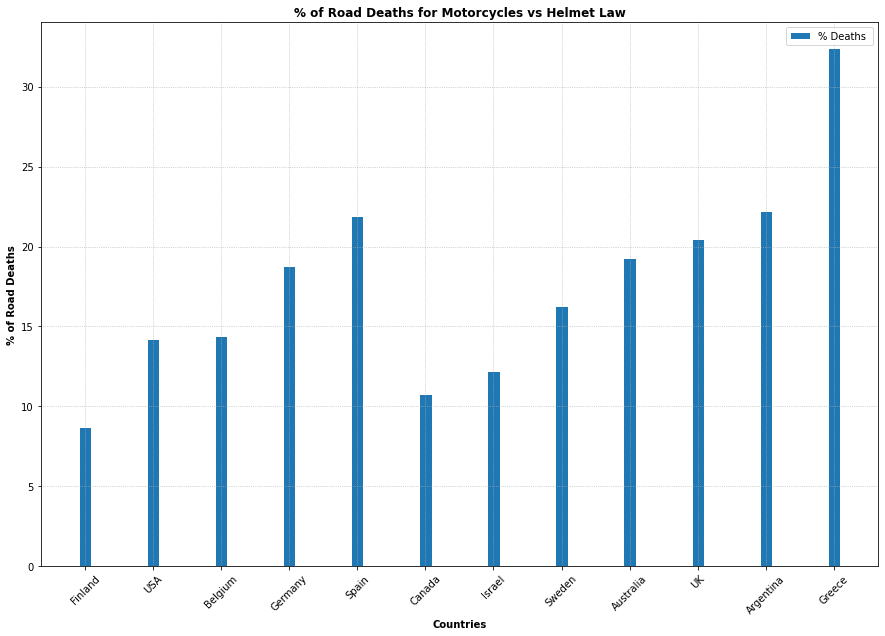

In [9]:
plt.figure(figsize = (15,10))
barWidth = 0.18

bar1 = pd.to_numeric( dfh['Deaths Avg'] )

r1 = np.arange(len(bar1)) + barWidth

plt.bar(r1, bar1, width = barWidth, edgecolor = 'white', label = '% Deaths ')
plt.title('% of Road Deaths for Motorcycles vs Helmet Law', fontweight = 'bold')
plt.ylabel('% of Road Deaths', fontweight = 'bold')
plt.xlabel('Countries', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], dfh['Country'] , rotation = 45)

plt.legend(loc = 'upper right')
plt.grid(linestyle = 'dotted', linewidth = 0.7)

plt.savefig( '../output_data/jb_helmetlaw.png', facecolor='w' )
plt.show()

In [10]:
df_helmlaw2 = df_helmlaw.groupby(['Law']).mean()

df_helmlaw2

,Deaths Avg
Law,
No,15.6
Yes,19.1
